# ***Data Processing***

In [ ]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
movies = pd.DataFrame(pd.read_csv("movies.csv"))
movies = movies.drop(['Unnamed: 0'], axis=1)

movies.loc[movies["Year"] == '    ', ['Year']] = 0 
movies["Year"] = movies["Year"].fillna(-1)
movies["Year"] = movies["Year"].astype(float)

movies = movies[~movies['Budget'].astype(str).str.contains('Budget:')]
movies = movies[~movies['Budget'].astype(str).str.contains('Trivia')]
movies["Budget"] = movies["Budget"].str.replace(',','')
movies["Budget"] = movies["Budget"].fillna(-1)
movies["Budget"] = movies["Budget"].astype(float)

movies["Gross US"] = movies["Gross US"].str.replace(',','')
movies["Gross US"] = movies["Gross US"].fillna(-1)
movies["Gross US"] = movies["Gross US"].astype(float)

movies["Gross WW"] = movies["Gross WW"].str.replace(',','')
movies["Gross WW"] = movies["Gross WW"].fillna(-1)
movies["Gross WW"] = movies["Gross WW"].astype(float)

movies["Language"] = movies["Language"].fillna(-1)

movies["Rating"] = movies["Rating"].fillna('Unrated')

movies["Duration"] = movies["Duration"].fillna(-1)
movies=movies.rename(columns = {'Duration':'Duration_Minutes'})

movies=movies.rename(columns = {'Average Rating':'Average_Rating'})
print(movies.dtypes)

Filling NA with median value

In [ ]:
# def fill_nan(col):
#     movies[col] = movies[col].fillna(movies[col].median())

# cols = list(movies.columns)
# fill_nan(cols)

In [ ]:
movies.columns

In [ ]:
movies.head()

In [ ]:
# col = list(movies.describe().columns)
# sc = StandardScaler()
# temp = sc.fit_transform(movies[col])
# movies[col] = temp
# movies.head()

In [ ]:
movies.isnull().sum()

In [ ]:
to_drop = [2020,2021,2024] #Removing future releases (no data available)
movies=movies[~movies['Year'].isin(to_drop)] 

In [ ]:
movies['Rating'] = movies['Rating'].replace({'Not Rated':'Unrated'})

movies["Rating"].value_counts()

In [ ]:
drop_tv = ['TV-14' ,'TV-G', 'TV-MA', 'TV-Y', 'TV-PG' , 'TV-Y7' , 'GP' , 'Passed' , 'X' ]  #Removing TV shows/X rated movies
movies=movies[~movies['Rating'].isin(drop_tv)] 

In [ ]:
movies.info()

In [ ]:
import random
from wordcloud import WordCloud, STOPWORDS
text = (str(movies['Actors']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Actors')
plt.axis('off')
plt.show()

In [ ]:
# movies["Genres"].value_counts()

In [ ]:
# seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'
# for genre in seperate_genre:
#     df = movies['Genres'].str.contains(genre).fillna(False)
#    # print('The total number of movies with ',Genres,'=',len(movies[df]))
#     f, ax = plt.subplots(figsize=(20, 20))
#     sns.countplot(x='Year', data=movies[df], palette="Greens_d");
#     plt.title(genre)
   

In [ ]:
# movies.Director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
# # plt.title('TOP 10 Directors OF MOVIES')

In [ ]:
# movies.Actors.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
# plt.title('TOP 10 Actors OF MOVIES')

In [ ]:
movies["Year"].value_counts().to_frame()

In [1]:
movies_09_19=movies[(2020 < movies['Year']) & (movies['Year'] > 2010)]

NameError: name 'movies' is not defined

In [2]:
#top 10 rating movies 
Sortedrating= movies.sort_values(['Average_Rating'], ascending=False)
Sortedrating.head(10)

NameError: name 'movies' is not defined

In [3]:
# low rated movies
lowratedmovies= movies.query('(Average_Rating > 0) & (Average_Rating < 3.0)')
lowratedmovies.head()

NameError: name 'movies' is not defined

In [4]:
Sortedrevenue= movies.sort_values(['Budget'], ascending=False)

NameError: name 'movies' is not defined

In [5]:
#top 5 high revenue movies
Sortedrevenue.head()

NameError: name 'Sortedrevenue' is not defined

In [6]:
m= Sortedrevenue.query('(Budget > 500)')
print('number of movies with more than half million revenue:')
len(m)

NameError: name 'Sortedrevenue' is not defined

In [63]:
n= Sortedrevenue.query('(Budget < 500)')
print('number of movies with less than half million revenue:')
len(n)

number of movies with less than half million revenue:


3593

In [64]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9184 entries, 0 to 9836
Data columns (total 14 columns):
Name                  9184 non-null object
Year                  9184 non-null float64
Genres                9184 non-null object
Rating                9184 non-null object
Duration_Minutes      9184 non-null float64
Actors                9184 non-null object
Director              9184 non-null object
Average_Rating        9184 non-null float64
Budget                9184 non-null float64
Opening Weekend       5241 non-null float64
Gross US              9184 non-null float64
Gross WW              9184 non-null float64
Language              9184 non-null object
Production Company    9184 non-null object
dtypes: float64(7), object(7)
memory usage: 1.1+ MB


In [65]:
from wordcloud import WordCloud, STOPWORDS
plt.subplots(figsize=(10,10))
text = (str(m['Actors']))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('ACTORS IN HIGH REVENUE MOVIES')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [66]:
from wordcloud import WordCloud, STOPWORDS
plt.subplots(figsize=(10,10))
text = (str(n['Actors']))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('ACTORS IN LOW REVENUE MOVIES')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [67]:
numeric_features=movies._get_numeric_data().columns.values.tolist()
numeric_features

['Year',
 'Duration_Minutes',
 'Average_Rating',
 'Budget',
 'Opening Weekend',
 'Gross US',
 'Gross WW']

# Correlation heatmap

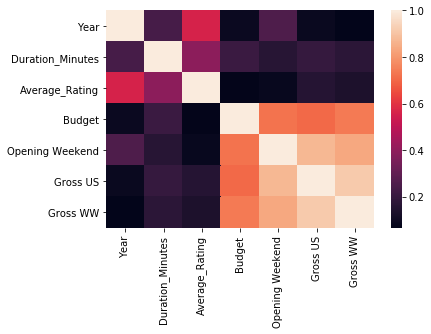

In [68]:
col = list(movies.describe().columns)
features=col
features
sns.heatmap(movies[features].corr())

In [69]:
movies.head()

,Name,Year,Genres,Rating,Duration_Minutes,Actors,Director,Average_Rating,Budget,Opening Weekend,Gross US,Gross WW,Language,Production Company
0,Pulp Fiction,1994.0,"['Crime', 'Drama']",R,154.0,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",['Quentin Tarantino'],8.9,8000000.0,9311882.0,107928762.0,213928762.0,"['English', 'Spanish', 'French']","['Miramax', 'ABandApart', 'JerseyFilms']"
1,The Amazing Spider-Man 2,2014.0,"['Action', 'Adventure', 'Sci-Fi']",PG-13,142.0,"['Andrew Garfield', 'Emma Stone', 'Jamie Foxx'...",['Marc Webb'],6.6,200000000.0,91608337.0,202853933.0,708982323.0,['English'],"['MarvelEnterprises', 'AviAradProductions', 'C..."
2,The Shawshank Redemption,1994.0,['Drama'],R,142.0,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont'],9.3,25000000.0,727326.0,28341469.0,58500000.0,['English'],['CastleRockEntertainment']
3,Star Wars: Episode IV - A New Hope,1977.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",PG,121.0,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",['George Lucas'],8.6,11000000.0,1554475.0,322740140.0,775398007.0,['English'],"['Lucasfilm', 'TwentiethCenturyFox']"
4,Back to the Future,1985.0,"['Adventure', 'Comedy', 'Sci-Fi']",PG,116.0,"['Michael J. Fox', 'Christopher Lloyd', 'Lea T...",['Robert Zemeckis'],8.5,19000000.0,11332134.0,210609762.0,381109762.0,['English'],"['UniversalPictures', 'AmblinEntertainment', '..."


Dummy Encoding for Genres:

In [70]:
movies["Genres"] = movies["Genres"].str.replace('[','')
movies["Genres"] = movies["Genres"].str.replace(']','')
movies.head()

,Name,Year,Genres,Rating,Duration_Minutes,Actors,Director,Average_Rating,Budget,Opening Weekend,Gross US,Gross WW,Language,Production Company
0,Pulp Fiction,1994.0,"'Crime', 'Drama'",R,154.0,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",['Quentin Tarantino'],8.9,8000000.0,9311882.0,107928762.0,213928762.0,"['English', 'Spanish', 'French']","['Miramax', 'ABandApart', 'JerseyFilms']"
1,The Amazing Spider-Man 2,2014.0,"'Action', 'Adventure', 'Sci-Fi'",PG-13,142.0,"['Andrew Garfield', 'Emma Stone', 'Jamie Foxx'...",['Marc Webb'],6.6,200000000.0,91608337.0,202853933.0,708982323.0,['English'],"['MarvelEnterprises', 'AviAradProductions', 'C..."
2,The Shawshank Redemption,1994.0,'Drama',R,142.0,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont'],9.3,25000000.0,727326.0,28341469.0,58500000.0,['English'],['CastleRockEntertainment']
3,Star Wars: Episode IV - A New Hope,1977.0,"'Action', 'Adventure', 'Fantasy', 'Sci-Fi'",PG,121.0,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",['George Lucas'],8.6,11000000.0,1554475.0,322740140.0,775398007.0,['English'],"['Lucasfilm', 'TwentiethCenturyFox']"
4,Back to the Future,1985.0,"'Adventure', 'Comedy', 'Sci-Fi'",PG,116.0,"['Michael J. Fox', 'Christopher Lloyd', 'Lea T...",['Robert Zemeckis'],8.5,19000000.0,11332134.0,210609762.0,381109762.0,['English'],"['UniversalPictures', 'AmblinEntertainment', '..."


In [71]:
#movies= movies.set_index('Name').Genres.str.split(',', expand=True).stack() # this is converting the dataframe to series.. do we need this??

In [72]:
movies.head(5)

,Name,Year,Genres,Rating,Duration_Minutes,Actors,Director,Average_Rating,Budget,Opening Weekend,Gross US,Gross WW,Language,Production Company
0,Pulp Fiction,1994.0,"'Crime', 'Drama'",R,154.0,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",['Quentin Tarantino'],8.9,8000000.0,9311882.0,107928762.0,213928762.0,"['English', 'Spanish', 'French']","['Miramax', 'ABandApart', 'JerseyFilms']"
1,The Amazing Spider-Man 2,2014.0,"'Action', 'Adventure', 'Sci-Fi'",PG-13,142.0,"['Andrew Garfield', 'Emma Stone', 'Jamie Foxx'...",['Marc Webb'],6.6,200000000.0,91608337.0,202853933.0,708982323.0,['English'],"['MarvelEnterprises', 'AviAradProductions', 'C..."
2,The Shawshank Redemption,1994.0,'Drama',R,142.0,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont'],9.3,25000000.0,727326.0,28341469.0,58500000.0,['English'],['CastleRockEntertainment']
3,Star Wars: Episode IV - A New Hope,1977.0,"'Action', 'Adventure', 'Fantasy', 'Sci-Fi'",PG,121.0,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",['George Lucas'],8.6,11000000.0,1554475.0,322740140.0,775398007.0,['English'],"['Lucasfilm', 'TwentiethCenturyFox']"
4,Back to the Future,1985.0,"'Adventure', 'Comedy', 'Sci-Fi'",PG,116.0,"['Michael J. Fox', 'Christopher Lloyd', 'Lea T...",['Robert Zemeckis'],8.5,19000000.0,11332134.0,210609762.0,381109762.0,['English'],"['UniversalPictures', 'AmblinEntertainment', '..."


In [ ]:
pd.get_dummies(movies).groupby(level=0).sum()

In [ ]:
movies.to_excel('output.xlsx')

In [ ]:
movies = movies[~((movies['Year'] == 0) & (movies['Rating'] == 'Unrated') & (movies['Duration_Minutes'] == -1) & (movies['Actors'] == " ")& (movies['Average_Rating'] == -1) & (movies['Director'] == " ")& (movies['Budget'] == -1))]
#remove 